In [17]:
import pandas as pd

file_path = 'Apple 2009-2024.csv'

try:
    file_path = 'Apple 2009-2024.csv'
    data = pd.read_csv(file_path)
    print(data)  # Tüm verileri yazdır
except FileNotFoundError:
    print("Dosya bulunamadı. Lütfen dosya yolunu kontrol edin veya dosyayı tekrar yükleyin.")



    year EBITDA (millions) Revenue (millions) Gross Profit (millions)  \
0   2024          $134,661           $391,035                $180,683   
1   2023          $125,820           $383,285                $169,148   
2   2022          $130,541           $394,328                $170,782   
3   2021          $120,233           $365,817                $152,836   
4   2020           $77,344           $274,515                $104,956   
5   2019           $76,477           $260,174                 $98,392   
6   2018           $81,801           $265,595                $101,839   
7   2017           $71,501           $229,234                 $88,186   
8   2016           $70,529           $215,639                 $84,263   
9   2015           $82,487           $233,715                 $93,626   
10  2014           $60,449           $182,795                 $70,537   
11  2013           $55,756           $170,910                 $64,304   
12  2012           $58,518           $156,508      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Apple 2009-2024.csv'
data = pd.read_csv(file_path)

def clean_column(column):
    if data[column].dtype == 'object':  
        return pd.to_numeric(data[column].str.replace(r'[\\$,]', '', regex=True).str.replace('%', '', regex=True), errors='coerce')
    else:
        return data[column]

columns_to_clean = ['EBITDA (millions)', 'Revenue (millions)', 'Gross Profit (millions)', 
                    'Op Income (millions)', 'Net Income (millions)', 'Total Assets (millions)', 
                    'Cash on Hand (millions)', 'Long Term Debt (millions)', 
                    'Total Liabilities (millions)', 'Gross Margin']

for column in columns_to_clean:
    data[column] = clean_column(column)

print(data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          16 non-null     int64  
 1   EBITDA (millions)             16 non-null     int64  
 2   Revenue (millions)            16 non-null     int64  
 3   Gross Profit (millions)       16 non-null     int64  
 4   Op Income (millions)          16 non-null     int64  
 5   Net Income (millions)         16 non-null     int64  
 6   EPS                           16 non-null     object 
 7   Shares Outstanding            16 non-null     object 
 8   Year Close Price              16 non-null     float64
 9   Total Assets (millions)       16 non-null     int64  
 10  Cash on Hand (millions)       16 non-null     int64  
 11  Long Term Debt (millions)     16 non-null     int64  
 12  Total Liabilities (millions)  16 non-null     int64  
 13  Gross M

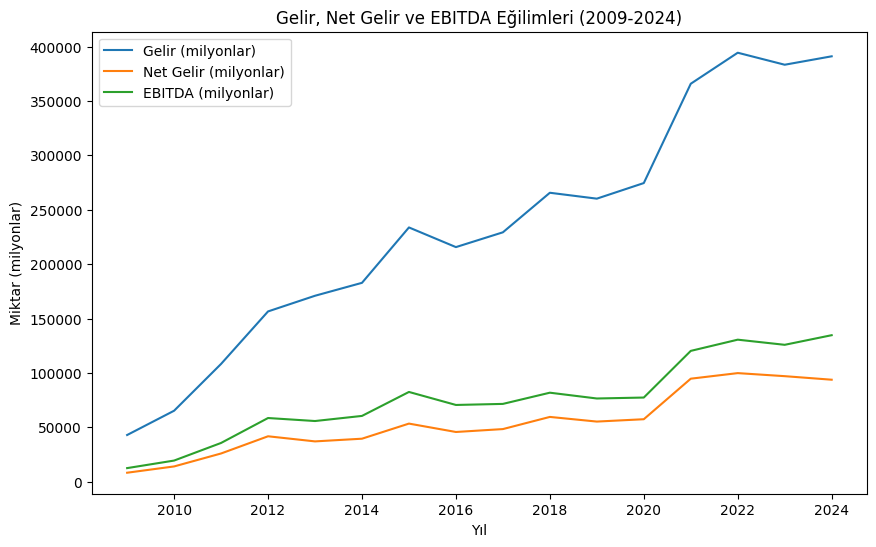

In [22]:
import matplotlib.pyplot as plt

# Gelir, Net Gelir ve EBITDA Eğilimleri
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Revenue (millions)'], label='Gelir (milyonlar)')
plt.plot(data['year'], data['Net Income (millions)'], label='Net Gelir (milyonlar)')
plt.plot(data['year'], data['EBITDA (millions)'], label='EBITDA (milyonlar)')
plt.title('Gelir, Net Gelir ve EBITDA Eğilimleri (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Miktar (milyonlar)')
plt.legend()
plt.show()


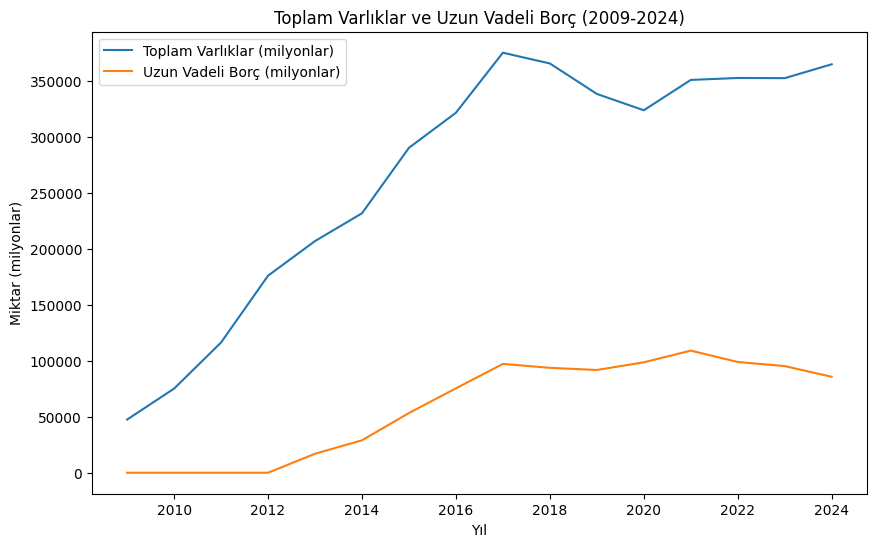

In [24]:
import matplotlib.pyplot as plt

# Toplam Varlıklar ve Uzun Vadeli Borç
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Total Assets (millions)'], label='Toplam Varlıklar (milyonlar)')
plt.plot(data['year'], data['Long Term Debt (millions)'], label='Uzun Vadeli Borç (milyonlar)')
plt.title('Toplam Varlıklar ve Uzun Vadeli Borç (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Miktar (milyonlar)')
plt.legend()
plt.show()

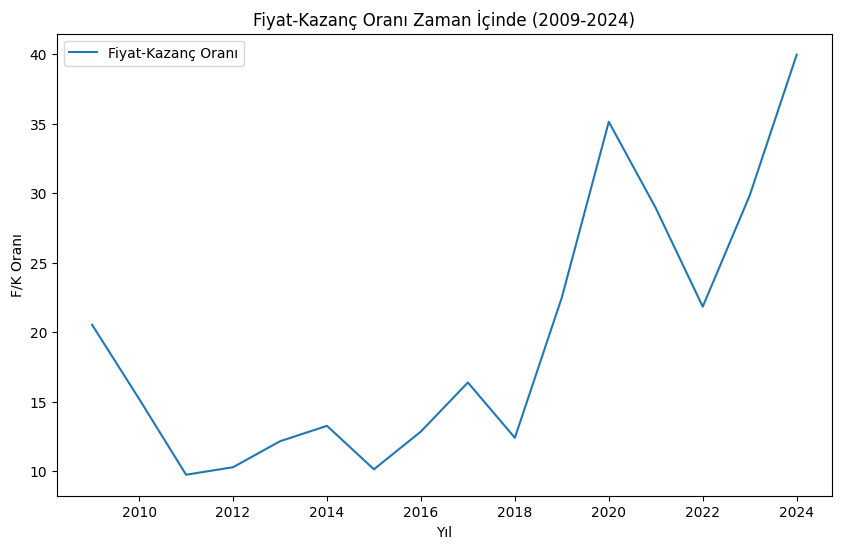

In [25]:
import matplotlib.pyplot as plt

# Fiyat-Kazanç Oranı
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['PE ratio'], label='Fiyat-Kazanç Oranı')
plt.title('Fiyat-Kazanç Oranı Zaman İçinde (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('F/K Oranı')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = data[['year']].dropna()
Y = data['Revenue (millions)'].dropna()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

future_years = pd.DataFrame({'year': [2025, 2026, 2027, 2028, 2029, 2030]})
future_revenue = model.predict(future_years)

print("Gelecek Gelir Tahminleri:")
for year, revenue in zip(future_years['year'], future_revenue):
    print(f"{year} yılı için tahmin edilen gelir: {revenue:.2f} milyon USD")


Gelecek Gelir Tahminleri:
2025 yılı için tahmin edilen gelir: 440073.24 milyon USD
2026 yılı için tahmin edilen gelir: 463650.64 milyon USD
2027 yılı için tahmin edilen gelir: 487228.04 milyon USD
2028 yılı için tahmin edilen gelir: 510805.44 milyon USD
2029 yılı için tahmin edilen gelir: 534382.84 milyon USD
2030 yılı için tahmin edilen gelir: 557960.24 milyon USD


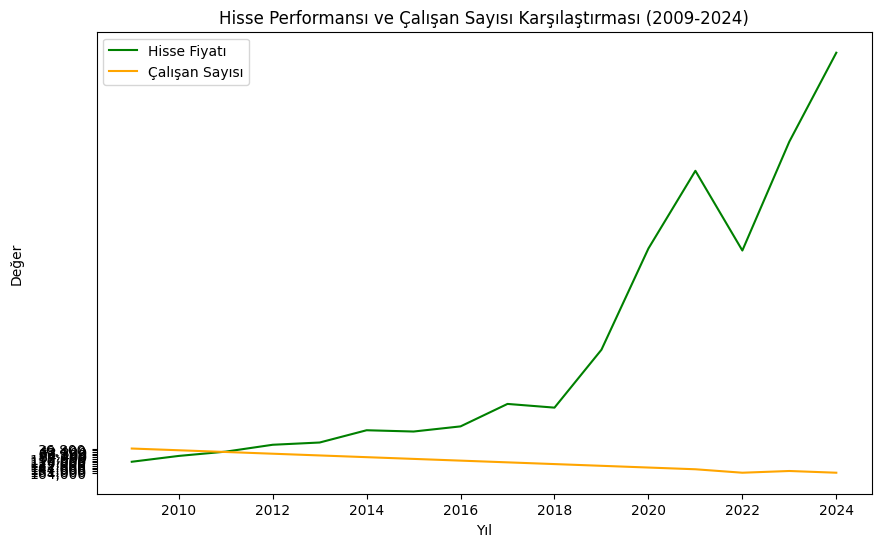

In [28]:
import matplotlib.pyplot as plt

# Hisse Fiyatı ve Çalışan Sayısı
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Year Close Price'], label='Hisse Fiyatı', color='green')
plt.plot(data['year'], data['Employees'], label='Çalışan Sayısı', color='orange')
plt.title('Hisse Performansı ve Çalışan Sayısı Karşılaştırması (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Değer')
plt.legend()
plt.show()


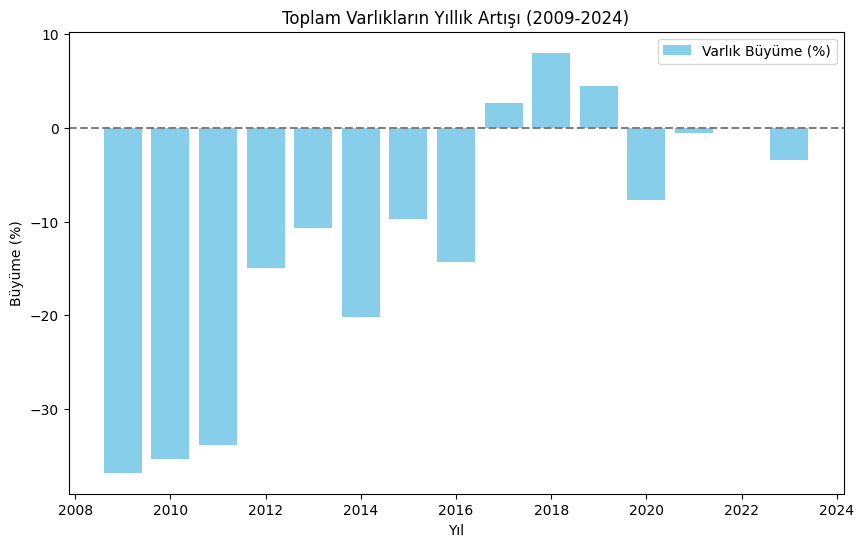

In [29]:
import matplotlib.pyplot as plt

# Toplam Varlıkların Yıllık Artışı
data['Asset Growth (%)'] = data['Total Assets (millions)'].pct_change() * 100
plt.figure(figsize=(10, 6))
plt.bar(data['year'][1:], data['Asset Growth (%)'][1:], label='Varlık Büyüme (%)', color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Toplam Varlıkların Yıllık Artışı (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Büyüme (%)')
plt.legend()
plt.show()


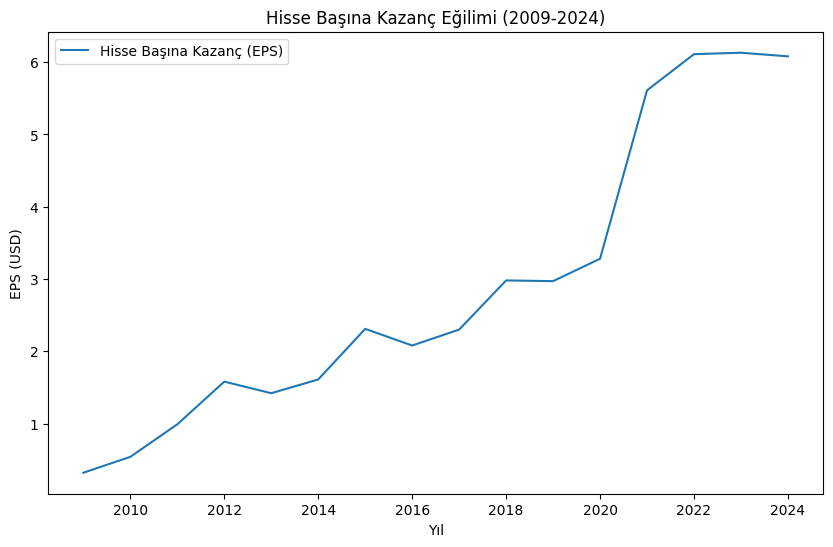

In [30]:
import matplotlib.pyplot as plt

# EPS (Hisse Başına Kazanç) Eğilimi
data['EPS'] = pd.to_numeric(data['EPS'].str.replace('[\\$,]', '', regex=True), errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['EPS'], label='Hisse Başına Kazanç (EPS)')
plt.title('Hisse Başına Kazanç Eğilimi (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('EPS (USD)')
plt.legend()
plt.show()


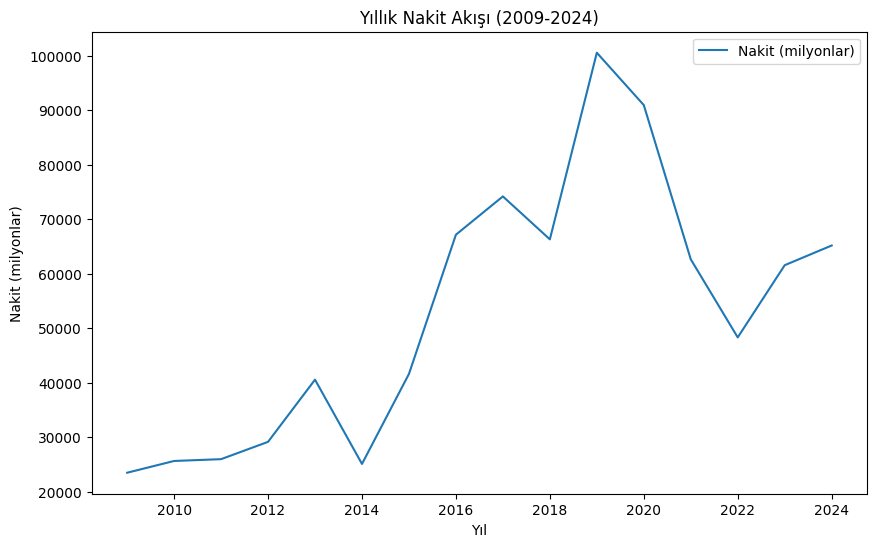

In [31]:
import matplotlib.pyplot as plt

# Nakit Değişimi
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Cash on Hand (millions)'], label='Nakit (milyonlar)')
plt.title('Yıllık Nakit Akışı (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Nakit (milyonlar)')
plt.legend()
plt.show()


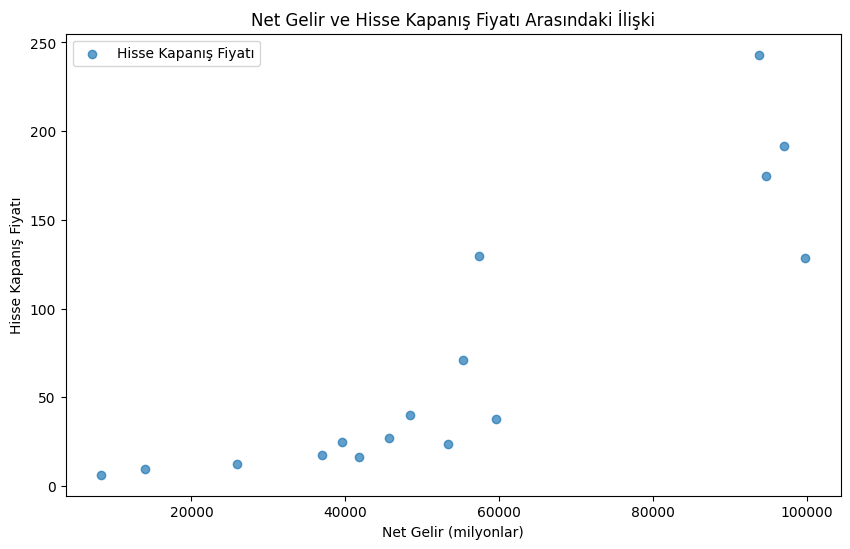

In [32]:
import matplotlib.pyplot as plt

# Net Gelir ve Hisse Kapanış Fiyatı Karşılaştırması
plt.figure(figsize=(10, 6))
plt.scatter(data['Net Income (millions)'], data['Year Close Price'], alpha=0.7, label='Hisse Kapanış Fiyatı')
plt.title('Net Gelir ve Hisse Kapanış Fiyatı Arasındaki İlişki')
plt.xlabel('Net Gelir (milyonlar)')
plt.ylabel('Hisse Kapanış Fiyatı')
plt.legend()
plt.show()


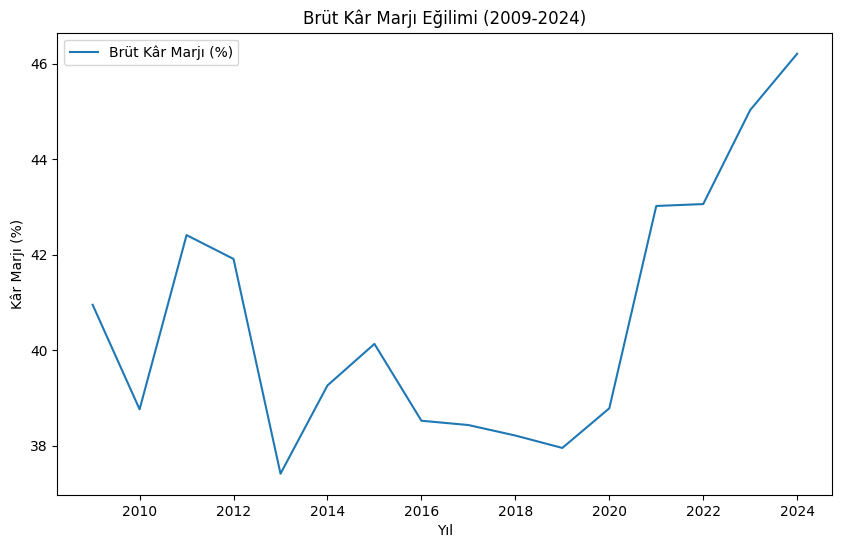

In [33]:
import matplotlib.pyplot as plt

# Brüt Kâr Marjı Eğilimi
data['Gross Margin (%)'] = data['Gross Margin']
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Gross Margin (%)'], label='Brüt Kâr Marjı (%)')
plt.title('Brüt Kâr Marjı Eğilimi (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Kâr Marjı (%)')
plt.legend()
plt.show()


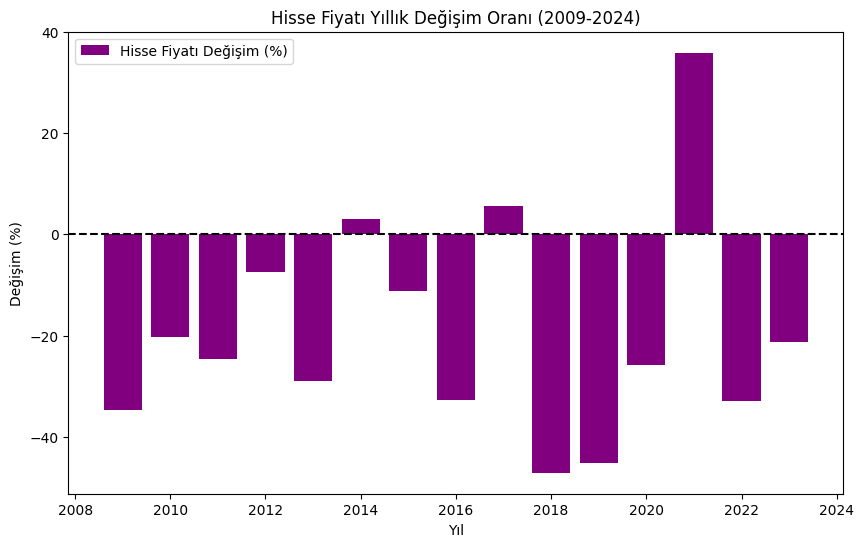

In [34]:
import matplotlib.pyplot as plt

# Hisse fiyatı yıllık değişim oranı
data['Price Change (%)'] = data['Year Close Price'].pct_change() * 100
plt.figure(figsize=(10, 6))
plt.bar(data['year'][1:], data['Price Change (%)'][1:], label='Hisse Fiyatı Değişim (%)', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Hisse Fiyatı Yıllık Değişim Oranı (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Değişim (%)')
plt.legend()
plt.show()


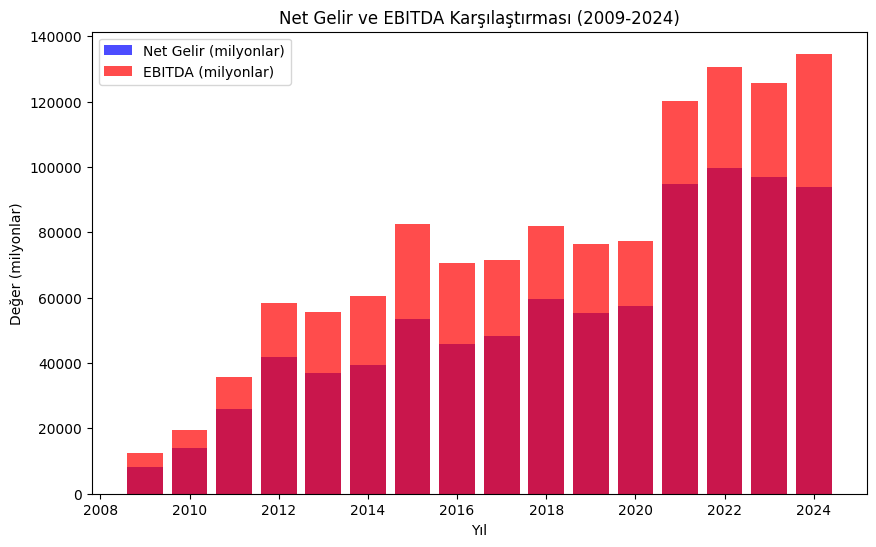

In [35]:
import matplotlib.pyplot as plt

# Net Gelir ve EBITDA Karşılaştırması
plt.figure(figsize=(10, 6))
plt.bar(data['year'], data['Net Income (millions)'], label='Net Gelir (milyonlar)', alpha=0.7, color='blue')
plt.bar(data['year'], data['EBITDA (millions)'], label='EBITDA (milyonlar)', alpha=0.7, color='red')
plt.title('Net Gelir ve EBITDA Karşılaştırması (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Değer (milyonlar)')
plt.legend()
plt.show()


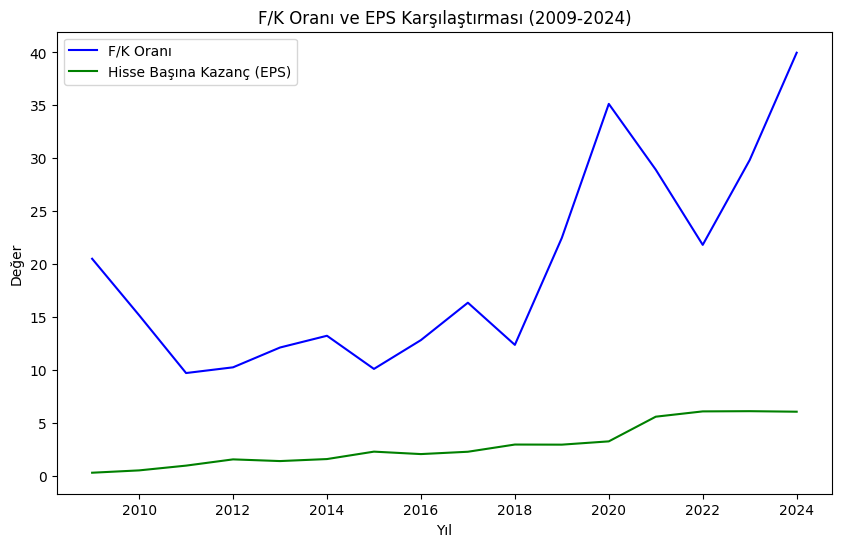

In [36]:
import matplotlib.pyplot as plt

# F/K Oranı ve EPS Karşılaştırması
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['PE ratio'], label='F/K Oranı', color='blue')
plt.plot(data['year'], data['EPS'], label='Hisse Başına Kazanç (EPS)', color='green')
plt.title('F/K Oranı ve EPS Karşılaştırması (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Değer')
plt.legend()
plt.show()


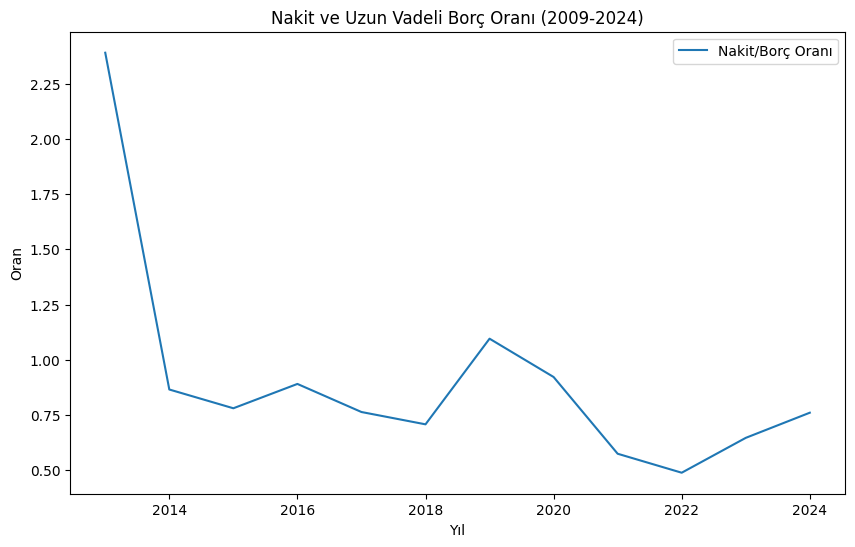

In [37]:
import matplotlib.pyplot as plt

# Nakit ve Uzun Vadeli Borç Oranı
data['Cash to Debt Ratio'] = data['Cash on Hand (millions)'] / data['Long Term Debt (millions)']
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Cash to Debt Ratio'], label='Nakit/Borç Oranı')
plt.title('Nakit ve Uzun Vadeli Borç Oranı (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Oran')
plt.legend()
plt.show()


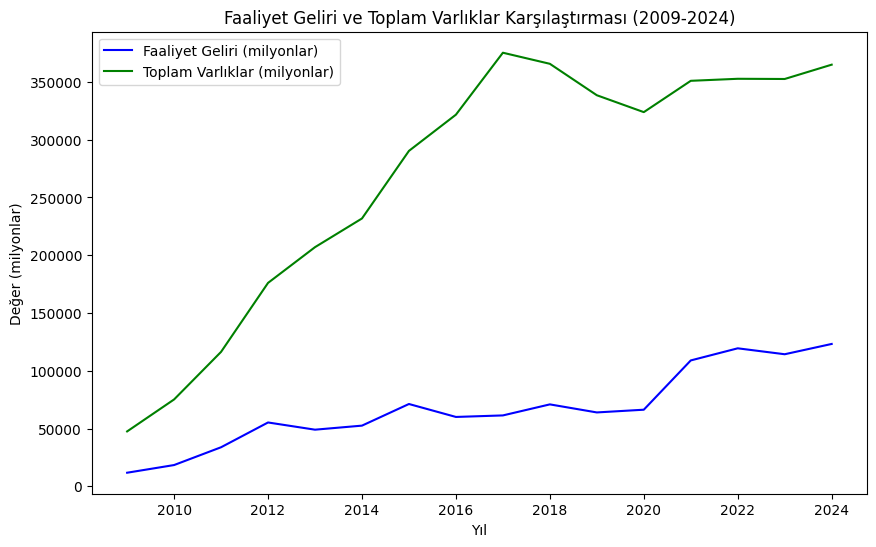

In [38]:
import matplotlib.pyplot as plt

# Faaliyet Geliri ve Toplam Varlıklar
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Op Income (millions)'], label='Faaliyet Geliri (milyonlar)', color='blue')
plt.plot(data['year'], data['Total Assets (millions)'], label='Toplam Varlıklar (milyonlar)', color='green')
plt.title('Faaliyet Geliri ve Toplam Varlıklar Karşılaştırması (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Değer (milyonlar)')
plt.legend()
plt.show()


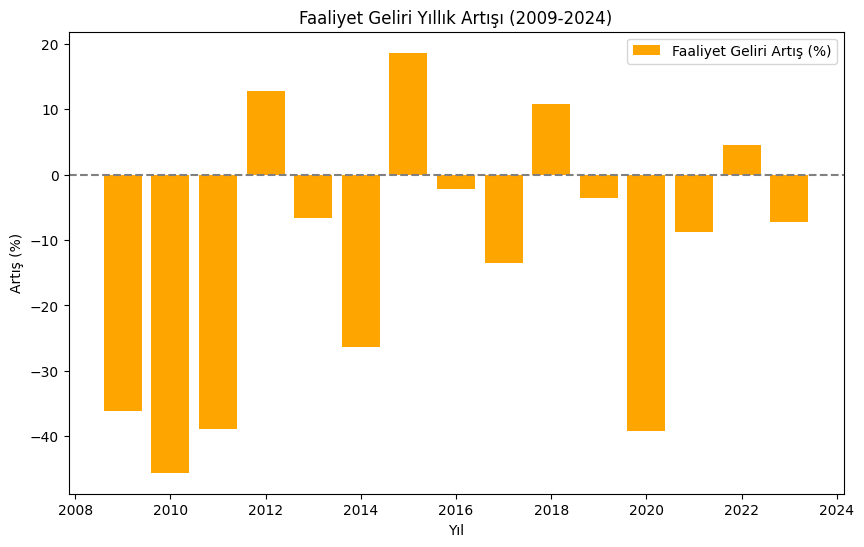

In [39]:
import matplotlib.pyplot as plt

# Faaliyet Geliri Yıllık Artışı
data['Op Income Growth (%)'] = data['Op Income (millions)'].pct_change() * 100
plt.figure(figsize=(10, 6))
plt.bar(data['year'][1:], data['Op Income Growth (%)'][1:], label='Faaliyet Geliri Artış (%)', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Faaliyet Geliri Yıllık Artışı (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Artış (%)')
plt.legend()
plt.show()


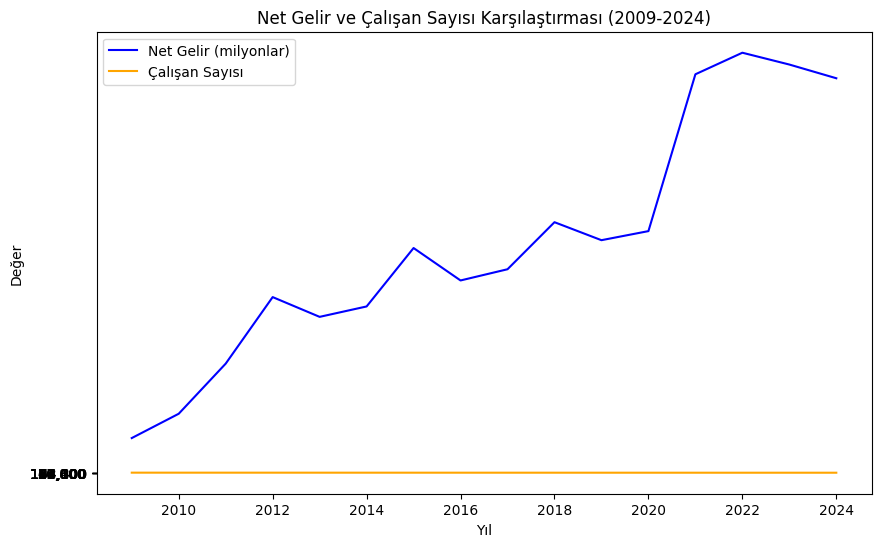

In [40]:
import matplotlib.pyplot as plt

# Çalışan Sayısı ve Net Gelir Karşılaştırması
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Net Income (millions)'], label='Net Gelir (milyonlar)', color='blue')
plt.plot(data['year'], data['Employees'], label='Çalışan Sayısı', color='orange')
plt.title('Net Gelir ve Çalışan Sayısı Karşılaştırması (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Değer')
plt.legend()
plt.show()


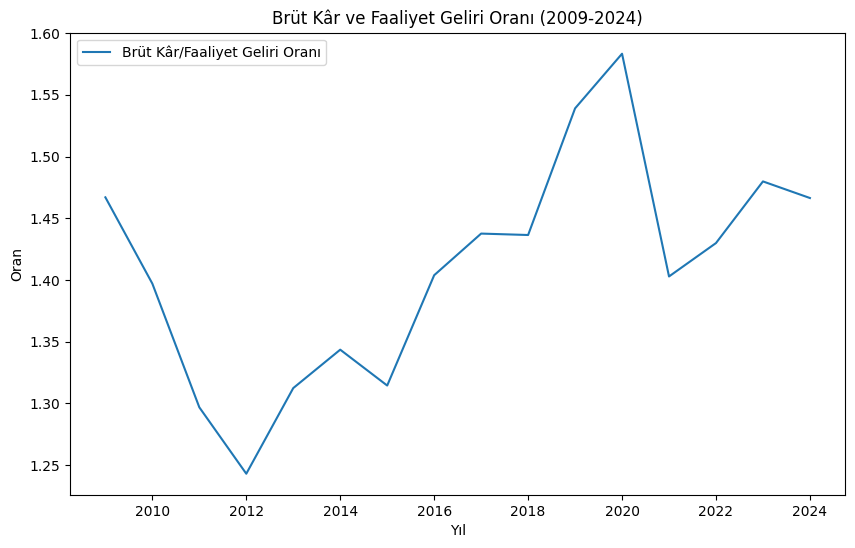

In [41]:
import matplotlib.pyplot as plt

# Brüt Kar ve Faaliyet Geliri Oranı
data['Gross to Op Income Ratio'] = data['Gross Profit (millions)'] / data['Op Income (millions)']
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Gross to Op Income Ratio'], label='Brüt Kâr/Faaliyet Geliri Oranı')
plt.title('Brüt Kâr ve Faaliyet Geliri Oranı (2009-2024)')
plt.xlabel('Yıl')
plt.ylabel('Oran')
plt.legend()
plt.show()
